In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

In [13]:
NUM_CLASSES=10 #
IMG_ROWS=IMG_COLS=28#

(X_train,y_train),(X_test,y_test)=mnist.load_data()#

X_train =X_train.reshape(X_train.shape[0],IMG_ROWS,IMG_COLS,1)#
X_test =X_test.reshape(X_test.shape[0],IMG_ROWS,IMG_COLS,1)#

X_train =X_train.astype('float32')/255.0#
X_test =X_test.astype('float32')/255.0#

y_train =keras.utils.to_categorical(y_train,NUM_CLASSES)#
y_test =keras.utils.to_categorical(y_test,NUM_CLASSES)#




In [14]:
model =Sequential()#

model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(IMG_ROWS,IMG_COLS,1)))
model.add(MaxPool2D(pool_size=(2,2)))#

model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))#
model.add(MaxPool2D(pool_size=(2,2)))#

model.add(Flatten())#
model.add(Dense(128,activation='relu'))#
model.add(Dense(NUM_CLASSES,activation='softmax'))#

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])#

In [15]:
model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))#

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 299s 5ms/step - loss: 0.2007 - acc: 0.9412 - val_loss: 0.0542 - val_acc: 0.9832
Epoch 2/10
60000/60000 [==============================] - 304s 5ms/step - loss: 0.0519 - acc: 0.9841 - val_loss: 0.0368 - val_acc: 0.9885
Epoch 3/10
46848/60000 [======================>.......] - ETA: 1:27 - loss: 0.0366 - acc: 0.9882

KeyboardInterrupt: 

In [22]:
model.evaluate(X_test ,y_test,verbose=1)

10000/10000 [==============================] - 22s 2ms/step


[0.031717647430568464, 0.99039999999999995]

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

def show_digit(pixels):
    img = pixels.reshape(28,28)
    plt.axis('off')
    plt.imshow(img,cmap='gray_r')
    

Resmin 0 olma olasılığı: 0.000155%
Resmin 1 olma olasılığı: 0.000050%
Resmin 2 olma olasılığı: 99.992692%
Resmin 3 olma olasılığı: 0.001424%
Resmin 4 olma olasılığı: 0.000000%
Resmin 5 olma olasılığı: 0.000000%
Resmin 6 olma olasılığı: 0.000000%
Resmin 7 olma olasılığı: 0.000629%
Resmin 8 olma olasılığı: 0.005059%
Resmin 9 olma olasılığı: 0.000000%


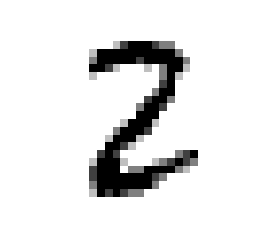

In [21]:
sample =random.choice(X_test)

show_digit(sample)

sample=sample.reshape(1,28,28,1)

predictions=model.predict(sample)[0]

for i,v in enumerate(predictions):
    print(u"Resmin %d olma olasılığı: %.6f%%" % (i,v*100))